# Importing Libraries

In [9]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import email
import re
from datetime import datetime as dt
# import sns

- NEW_vectorized_folders_df.csv
- emails.csv


# Loading Data

In [5]:
dataset_directory = "../Datasets/"
dataset_OG = pd.read_csv(os.path.join(dataset_directory, 'emails.csv'))

data = dataset_OG.copy() ## keeping a safe copy
data.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [0]:
data.shape

(517401, 2)

# Extracting Features 

This functions we're taken from Dondald's E-mail categorization notebook in Kaggle. You can find it <a href="https://www.kaggle.com/donaldtfung/e-mail-categorization/notebook?fbclid=IwAR3gqVcP7ZUpKlyqVXkaXYK0SOoZqrEfjxpBLT3VXnCzARk_RYiwsBFQIws">here.</a>

### Extracting Headers

In [ ]:
def insert_value(dictionary, key, value):
    if key in dictionary:
        values = dictionary.get(key)
        values.append(value)
        dictionary[key] = values
    else:
        dictionary[key] = [value]
    return dictionary

def get_headers(df, header_names):
    headers = {}
    messages = df["message"]
    for message in messages:
        e = email.message_from_string(message)
        for item in header_names:
            header = e.get(item)
            insert_value(dictionary = headers, key = item, value = header) 
    print("Successfully retrieved header information!")
    return headers

In [7]:
header_names = ["Date", "Subject", "X-Folder", "X-From", "X-To"] 
headers = get_headers(data, header_names)

for key in list(headers.keys()):
    data[key] = headers[key]
    
data.head()

Successfully retrieved header information!


,file,message,Date,Subject,X-Folder,X-From,X-To
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper


### Extracting Messages

In [ ]:
def get_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        message_body = message_body.lower()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages

In [8]:
data["Message-Body"] = get_messages(data)
data.head()

Successfully retrieved message body from e-mails!


,file,message,Date,Subject,X-Folder,X-From,X-To,Message-Body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"randy,\n\n can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,let's shoot for tuesday at 11:45.


### Getting Employee Names

In [ ]:
def add_name(df, column, labels):
    new_data = {}
    for item in df[column]: 
        tokens = item.split('/')
        for i in range(0, len(labels)):
            value = tokens[i]
            key = labels[i]
            new_data = insert_value(new_data, key, value)        
    for key, value in new_data.items():
        df[key] = pd.Series(value)
    print("Successfully added new column!")
    return df

In [0]:
x_from = pd.DataFrame(data["X-From"], columns = ["X-From"])
if "X-From" not in data.columns:
    data = pd.concat([data, x_from], axis = 1, join = 'inner')

data = add_name(df = data, column = "file", labels = ["employee"])
data.head()

Successfully added new column!


,file,message,Date,Subject,X-Folder,X-From,X-To,Message-Body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"randy,\n\n can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,let's shoot for tuesday at 11:45.,allen-p


# Further Data Processing

Once we had the data in a tabular for we had to perform further data extraction. This include extracting the data, converting it to datetime, and extraing the message from the `message` feature. 

### Converting Date to Datetime

In [ ]:
# return the numerical value of the month
# (e.g. Jan = 1, Feb = 2, ...)
def month_mapping(month_str):
    months = np.array(['Jan', 'Feb', 'Mar', 'Apr',
              'May', 'Jun', 'Jul', 'Aug',
              'Sep', 'Oct', 'Nov', 'Dec'])
    
    return np.where(months == month_str)[0][0] + 1

def extract_date(date_string):
    # should be of the format: DoW, Date, Month (MMM), Year (YYYY), 
    # Time (HH:MM:SS), timezone num, Timezone name
    date_array = re.split(" ", date_string)
    time_array = re.split(":", date_array[4])
    return dt(year = int(date_array[3]),
              month = month_mapping(date_array[2]),
              day = int(date_array[1]),
              hour = int(time_array[0]),
              minute = int(time_array[1]),
              second = int(time_array[2]))

In [0]:
data['Date_datetime'] = data['Date'].apply(extract_date)
data['Day_of_week'] = data['Date'].apply(lambda x: re.split(" ", x)[0][:-1])
data.head()

,file,message,Date,Subject,X-Folder,X-From,X-To,Message-Body,employee,Date_datetime,Day_of_week
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,here is our forecast\n\n,allen-p,2001-05-14 16:39:00,Mon
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,traveling to have a business meeting takes the...,allen-p,2001-05-04 13:51:00,Fri
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p,2000-10-18 03:00:00,Wed
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"randy,\n\n can you send me a schedule of the s...",allen-p,2000-10-23 06:13:00,Mon
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,let's shoot for tuesday at 11:45.,allen-p,2000-08-31 05:07:00,Thu


### X-Folder Contents

In [ ]:
def extract_folder_contents(x): 
    return re.split("\\\\", str(x))[-1].lower()

In [0]:
data['X-Folder-split'] = data['X-Folder'].apply(extract_folder_contents)
data.head()

,file,message,Date,Subject,X-Folder,X-From,X-To,Message-Body,employee,Date_datetime,Day_of_week,X-Folder-split
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,here is our forecast\n\n,allen-p,2001-05-14 16:39:00,Mon,'sent mail
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,traveling to have a business meeting takes the...,allen-p,2001-05-04 13:51:00,Fri,'sent mail
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p,2000-10-18 03:00:00,Wed,'sent mail
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"randy,\n\n can you send me a schedule of the s...",allen-p,2000-10-23 06:13:00,Mon,'sent mail
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,let's shoot for tuesday at 11:45.,allen-p,2000-08-31 05:07:00,Thu,'sent mail


In [0]:
#Add column with message length
data['message_length']  = data['Message-Body'].str.len()

#drop columns that are not needed anymore
columns_to_drop = ['file', 'X-From', 'X-Folder', 'X-To', 'employee']
data = data.drop(columns_to_drop, axis=1)

# Remaining columns to focus on
data.columns

# shows one entire message with all fields
print(data['message'][1])

In [0]:
data['contains-cc'] = data.message.str.contains(r'X-cc: .+').astype(int)

data['contains-bcc'] = data.message.str.contains(r'X-bcc: .+').astype(int)

data.head()

,message,Date,Subject,Message-Body,Date_datetime,Day_of_week,X-Folder-split,message_length,contains-cc,contains-bcc
0,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,here is our forecast\n\n,2001-05-14 16:39:00,Mon,'sent mail,23,False,False
1,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,traveling to have a business meeting takes the...,2001-05-04 13:51:00,Fri,'sent mail,786,False,False
2,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,test successful. way to go!!!,2000-10-18 03:00:00,Wed,'sent mail,30,False,False
3,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,"randy,\n\n can you send me a schedule of the s...",2000-10-23 06:13:00,Mon,'sent mail,187,False,False
4,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,let's shoot for tuesday at 11:45.,2000-08-31 05:07:00,Thu,'sent mail,35,False,False


In [ ]:
data.to_csv(os.path.join(dataset_directory, "preprocessed_data.csv"))

## Clustering

In [0]:
import numpy as np
import pandas as pd

import gensim
from gensim.models import KeyedVectors, Word2Vec

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
data2 = data.copy()

In [0]:
# Step 1
# SKIP IF ALREADY HAVE vectorized_folders_df

!wget -nd https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

# Words are encoded into length 300 vector

--2019-05-07 07:38:01--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.185.173
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.185.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  84.1MB/s    in 26s     

2019-05-07 07:38:27 (61.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
# Step 2

# RUN THIS CELL IF DO NOT HAVE EMBEDDINGS YET
# RUN THE CELL BELOW IF ALREADY DO

# Preprocess the labels

#    Remove certain words that are irrelevant
#    e.g. the NLTK stopwords, 'items', 'inbox'

def remove_unnecessary_words(s):
    tokenized_s = word_tokenize(s)
    add_to_stopwords = ['items', 'item', 'mails', 'mail', 
                      'inboxes', 'inbox', 'threads', 'thread']
    to_remove = stopwords.words('english') + add_to_stopwords
    new_sent = [c for c in tokenized_s if not c in to_remove]
    return ' '.join(new_sent)

#    Remove punctuation

def remove_punctuation(s):
    return ''.join([s[i] for i in np.arange(len(s)) if not s[i] in string.punctuation])


#    Find vector representation of every folder
#    If folder has multiple words after cleaning,
#    then just average the vectors

def vector_rep(word):
    if word in model.wv.vocab:
        return model.wv[word]
    return np.zeros(shape=(1, 300))

def general_vector_rep(phrase):
    tokenized = word_tokenize(phrase)
    if (len(tokenized) == 0):
        return np.zeros(shape=(1, 300))
    if (len(tokenized) == 1):
        return vector_rep(tokenized[0])
    vectors = np.zeros(shape = (len(tokenized), 300))
    for i, word in enumerate(tokenized):
        vectors[i] = vector_rep(word).reshape((1, 300))
    #print(vectors)
    return np.average(vectors, axis=0)

def make_vector_rep_df(labels):
    d = dict.fromkeys(labels)
    for key in list(d.keys()):
        d[key] = general_vector_rep(key)
    df = pd.DataFrame.from_dict(d, orient='index')
    del d
    for i in np.arange(len(df)):
        if(pd.isnull(df.iloc[i, 1])):
            df.iloc[i, :] = pd.Series(np.zeros(300))
    return df


data2['X-Folder-split_cleaned'] = data2['X-Folder-split'].apply(remove_unnecessary_words)
data2['X-Folder-split_cleaned'] = data2['X-Folder-split_cleaned'].apply(remove_punctuation)
vectorized_folders_df = make_vector_rep_df(list(data2['X-Folder-split_cleaned'].unique()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


[-0.67695268 -0.63491529  2.95959552 -0.64114383 -0.67041276 -0.0176373
  0.2901788   0.22088992 -0.68010893 -0.14949346]
[-0.62812492 -0.5218733  -0.8144685  -0.42829967 -0.68669157  1.11955266
  1.5172405   0.82177795 -0.49046844  0.1113553 ]


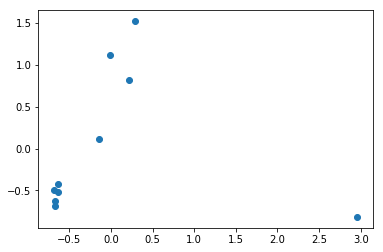

In [0]:
# Step 3

kmeans1 = KMeans(n_clusters = 10)
kmeans1.fit(vectorized_folders_df)
labels1 = kmeans1.predict(vectorized_folders_df)
vectorized_folders_df['label'] = labels1

centers1 = kmeans1.cluster_centers_

pca_model1 = PCA(n_components=2)
centers_pca1 = pca_model1.fit_transform(centers1)
centers_pca1_X = centers_pca1.T[0]
centers_pca1_y = centers_pca1.T[1]

print(centers_pca1_X)
print(centers_pca1_y)

plt.scatter(centers_pca1_X, centers_pca1_y)

In [0]:
# Remove the word embedding columns from vectorized_folders_df
vectorized_folders_df = vectorized_folders_df.reset_index().rename(columns = {'index': 'subject'})
vectorized_folders_df = vectorized_folders_df[['subject', 'label']]

Unfortunately, many of these items were not placed in the correct label. After much manual feature engineering (refer to the PDF labeled 'Updated_labels' for more details) to modify the labels, we read in the NEW_vectorized_folders_df instead.

In [0]:
link = 'https://drive.google.com/open?id=1NtrrpIt7JEonzcoskgj-2N4Mf3vic6yF'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('NEW_vectorized_folders_df.csv')

NEW_vectorized_folders_df = pd.read_csv('NEW_vectorized_folders_df.csv')
NEW_vectorized_folders_df = NEW_vectorized_folders_df[['subject', 'label']]

## Joining Clustering Results with Main DF

In [0]:
data2 = data2.merge(right = NEW_vectorized_folders_df,
                    how = 'left',
                    left_on = 'X-Folder-split_cleaned',
                    right_on = 'subject')

data = data2.copy()

## Drop Labels 1 and 2

In [0]:
data_filtered = data[(data['label'] != 1) & 
                     (data['label'] != 2)]

The data_filtered is ready to go as our main dataset. Unfortunately, we cannot export to CSV because there aren't any delimiters that work -- the message bodies contain the special characters we'd use as delimiters and so they cause errors in reading back in the exported CSV.

As such, the preprocessing must be run each time the notebook is opened.

## One Hot Encoding and Adding in Embedded Dataset

In [0]:
dfDummies = pd.get_dummies(data_filtered['Day_of_week'], prefix = 'Day= ')
data_filtered = pd.concat([data_filtered, dfDummies], axis=1)
data_filtered = data_filtered.drop(labels='Day_of_week', axis=1)

In [0]:
embedded_df = pd.read_csv('Embedded_Dataset.csv')
embedded_df.head()

,Unnamed: 0,message_length,label,0,1,2,3,4,5,6,...,247,248,249,Day= _Fri,Day= _Mon,Day= _Sat,Day= _Sun,Day= _Thu,Day= _Tue,Day= _Wed
0,0,262,0,0,0,0,0,0,0,0,...,5,13,5,0,0,0,0,0,1,0
1,1,1255,0,0,0,0,0,0,0,0,...,56189,17,76024,0,0,0,0,1,0,0
2,2,1120,0,0,0,0,0,0,0,0,...,374,1365,6669,0,0,0,0,1,0,0
3,3,541,0,0,0,0,0,0,0,0,...,32619,17,26431,0,0,0,0,1,0,0
4,4,1415,0,366,137,1915,47,10180,1061,8563,...,86,1957,76038,1,0,0,0,0,0,0


In [0]:
print(data_filtered.shape)
print(embedded_df.shape)

(71374, 19)
(29141, 260)


## Decision Tree

In [0]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import 

In [0]:
data_filtered_cleaned = embedded_df

In [0]:
data_filtered_cleaned.head(1)

,Unnamed: 0,message_length,label,0,1,2,3,4,5,6,...,247,248,249,Day= _Fri,Day= _Mon,Day= _Sat,Day= _Sun,Day= _Thu,Day= _Tue,Day= _Wed
0,0,262,0,0,0,0,0,0,0,0,...,5,13,5,0,0,0,0,0,1,0


In [0]:
data_filtered_cleaned.columns

Index(['Unnamed: 0', 'message_length', 'label', '0', '1', '2', '3', '4', '5',
       '6',
       ...
       '247', '248', '249', 'Day= _Fri', 'Day= _Mon', 'Day= _Sat', 'Day= _Sun',
       'Day= _Thu', 'Day= _Tue', 'Day= _Wed'],
      dtype='object', length=260)

In [0]:
# days_dict = {'Sun': 0, 'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6}

# data_filtered_cleaned = data_filtered_cleaned.replace({'Day_of_week': days_dict})

In [0]:

# label_words = ['weather', 'administrative', 'random', 'financial', 'related', 'places', 'legal', 'business', 'random', 'firms', 'recruiting']

# for label in label_words:
#   data_filtered_cleaned[label] = data_filtered_cleaned['Message-Body'].str.count(label)

In [0]:
# # columns = ['Day_of_week', 'message_length', 'contains-cc', 'contains-bcc', 'label'].extend(label_words)

# data_filtered_cleaned = data_filtered_cleaned[['weather', 'administrative', 'random', 'financial', 'related', 'places', 'legal', 'business', 'random', 'firms', 'recruiting', 'message_length', 'contains-cc', 'contains-bcc', '''label']]
# data_filtered_cleaned.head()

In [0]:
X = data_filtered_cleaned.values[:, 3:]
Y = data_filtered_cleaned.values[:, 2]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [0]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=630, min_samples_leaf=3000)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=630,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [0]:
y_pred = clf.predict(X_test)

In [0]:
y_pred_train = clf.predict(X_train)

In [0]:
print("Decision Tree Accuracy train is ", accuracy_score(y_train, y_pred_train)*100)

Decision Tree Accuracy train is  38.60672614962251


In [0]:
# Feature Importance Exploration for DT
importances = clf.feature_importances_
imp = pd.DataFrame()
imp['feature'], imp['importance'] = X_train.columns, importances
print("Feature ranking:")
print(imp.sort_values(by='importance', ascending=False))
plt.figure(figsize=(23, 10))
sns.barplot(x='feature', y='importance', data=imp)
plt.title('Feature Importance')
plt.show()

Decision Tree Accuracy is  38.682374471005375


In [0]:
# add feature for how many times category labels appear in the body
# NEW_vectorized_folders_df.head()

In [0]:
# X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)

clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred_rf = clf.predict(X_test)

In [0]:
print("Random Forest Accuracy is ", accuracy_score(y_test, y_pred_rf)*100)

In [0]:
# Feature Importance Exploration for RF
importances = clf_rf.feature_importances_
imp = pd.DataFrame()
imp['feature'], imp['importance'] = X_train.columns, importances
print("Feature ranking:")
print(imp.sort_values(by='importance', ascending=False))
plt.figure(figsize=(23, 10))
sns.barplot(x='feature', y='importance', data=imp)
plt.title('Feature Importance')
plt.show()

In [0]:
# Bagging
kfold = KFold(n_splits=30, random_state=0)
bag = BaggingClassifier(base_estimator=clf, n_estimators=100,
                        random_state=42, max_samples=0.5, max_features=0.5)
bag.fit(X_train, y_train)
# results = cross_val_score(bag, X1, y1, cv=kfold)
# print('Bagging: ', results.mean())

In [0]:
print("Accuracy Score of Bagging on train set", bag.score(X_train, y_train)*100,'%')
print("Accuracy Score of Bagging on test set",bag.score(X_test, y_test)*100,'%')

## KNN

### 0. Import Libraries and Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
import pickle

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link = 'https://drive.google.com/open?id=1YwbXa6EcJIqT_tz7t8lwvi8TBwGEjS4o'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Embedded_Dataset.csv')  

data = pd.read_csv('Embedded_Dataset.csv', index_col = 0)
data.head()

In [0]:
y = data['label']
X = data.drop('label', axis=1)

### 1. Build and Test KNN Models

In [0]:
def run_knn(X, y, prop_test, n):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=prop_test)
  knn = KNN(n_neighbors = n)
  print("... Fitting model ...")
  knn.fit(X_train, y_train)
  print("... Train set predictions ...")
  train_preds = knn.predict(X_train)
  print("... Test set predictions ...")
  test_preds = knn.predict(X_test)

  train_score = sum(train_preds == y_train) / len(y_train)
  test_score = sum(test_preds == y_test) / len(y_test)

  print("Training accuracy:", train_score)
  print("Testing accuracy: ", test_score)
  
  return train_score, test_score

In [0]:
n_range = np.arange(3, 22)
results = np.zeros(shape=(len(n_range), 2))

for i in n_range:
  results[i-3, 0], results[i-3, 1] = run_knn(X, y, 0.2, i)

In [0]:
plt.plot(n_range, np.transpose(results)[0], color='blue', label="Train set accuracy")
plt.plot(n_range, np.transpose(results)[1], color='red', label="Test set accuracy")
plt.xticks(n_range)
plt.legend()
plt.title("Train and Test Accuracies per N")

The test accuracy hovers at around 37% or 38% for all values of *n*, but *n=20* had the lowest gap between the train accuracy and test accuracy.

Just because it is a better practice to use an odd number of n (so there will always be a majority vote), I will use *n = 21* in the model I tune.

In [0]:
final_knn = KNN(n_neighbors = 21)
final_knn_fitted = final_knn.fit(X, y)

### 2. Bagged KNN

Bagging the KNN may improve performance

In [0]:
prop_test = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=prop_test)
bagging = BaggingClassifier(base_estimator = final_knn,
                         n_estimators = 50)
print("... Fitting model ...")
bagging.fit(X_train, y_train)
print("... Train set predictions ...")
train_preds = bagging.predict(X_train)
print("... Test set predictions ...")
test_preds = bagging.predict(X_test)
train_score = sum(train_preds == y_train) / len(y_train)
test_score = sum(test_preds == y_test) / len(y_test)
print("Training accuracy:", train_score)
print("Testing accuracy: ", test_score)

It didn't work: the traing accuracy is 46% again and test accuracy is 38%.

### 3. PCA then KNN

Maybe using PCA to reduce dimensionality will improve KNN performance

In [0]:
n_range = np.arange(2, 21)

results = np.zeros(shape=(len(n_range), 2))

for i in n_range:
  print("Dimension:", i)
  X_pca = PCA(n_components = i).fit_transform(X)
  results[i-2, 0], results[i-2, 1] = run_knn(X_pca, y, 0.2, 21)
  
plt.plot(n_range, np.transpose(results)[0], color='blue', label="Train set accuracy")
plt.plot(n_range, np.transpose(results)[1], color='red', label="Test set accuracy")
plt.xticks(n_range)
plt.legend()
plt.title("Train and Test Accuracies per Dimension")

It looks as if training accuracy peaked at around 46.5% accuracy and test accuracy peaked at around 39%, which occurred at 14 dimensions.

This isn't much improvement from the original KNN model, so I will just save that one.